<a href="https://colab.research.google.com/github/j-claudinei-f/j-claudinei-f/blob/main/ajuste_linear_restri%C3%A7ao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Cálculo Numérico:**

**Ajuste de curvas: caso linear com restrições**


 *José Claudinei Ferrreira*

 *Universidade Federal de Alfenas (UNIFAL-MG)*

#**Exemplo:**

Cosidere $x=(1.3,	3.4,	5.1,	6.8,	8.0)$ e $
f(x)\approx y=(	2.0,	3.2,	3.8,	4.7,	5.8)$.
A partir dos dados disponíveis, pode-se desejar saber uma estimativa do valor da função  $f(s)$ em $s= 9$.

Vejamos isso gráficamante:

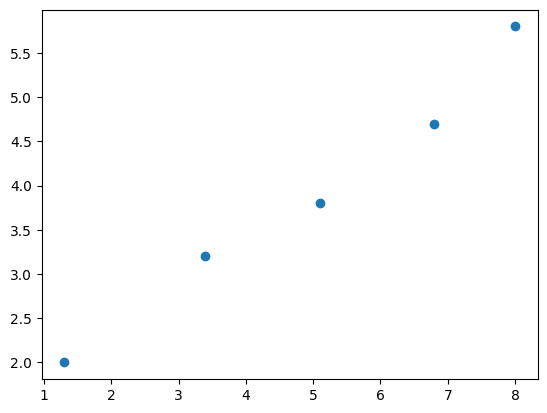

In [ ]:
import numpy as np
x=[1.3,	3.4,	5.1,	6.8,	8.0]
x=np.array(x)
y=[2.0,	3.2,	3.8,	4.7,	5.8]

import matplotlib.pyplot as plt

plt.plot(x,y,'o')
plt.show()

A forma do gráfico sugere que $$f(s)\approx as^2+bs+c.$$ Isso e os dados da tabela produzem a expressão
$$ \begin{bmatrix}f_1(x_1)&f_2(x_1)&f_3(x_1)\\\\
f_1(x_2)&f_2(x_2)&f_3(x_2)\\
\vdots&\vdots\\
f_1(x_n)&f_2(x_n)&f_3(x_n)\end{bmatrix}\begin{bmatrix}a\\\\b\\\\c\end{bmatrix}\approx\begin{bmatrix}y_1\\\\y_2\\\vdots\\y_n\end{bmatrix},$$ em que $f_1(s)=s^2$, $f_2(s)=s$ e $f_3(s)=1$.

<font color=blue> Vamos supor que $f(x_i)\leq y_i$, para $1\leq i\leq 5$.





o que equivale ao sistema linear
$$ \begin{bmatrix}1.3^2&1.3&1\\\\3.4^2&3.4&1\\\\5.1^2&5.1&1\\\\6.8^2&6.8&1\\\\8.0^2&8.0&1\end{bmatrix}\begin{bmatrix}a\\\\b\\\\c\end{bmatrix}\approx\begin{bmatrix}2.0\\\\ 3.2\\\\ 3.8\\\\ 4.7\\\\5.8\end{bmatrix},\tag{1}$$ com a restrição
$$ \begin{bmatrix}1.3^2&1.3&1\\\\3.4^2&3.4&1\\\\5.1^2&5.1&1\\\\6.8^2&6.8&1\\\\8.0^2&8.0&1\end{bmatrix}\begin{bmatrix}a\\\\b\\\\c\end{bmatrix}\leq\begin{bmatrix}2.0\\\\ 3.2\\\\ 3.8\\\\ 4.7\\\\5.8\end{bmatrix}.\tag{2}$$


Podemos verificar rápidamente (olhando o Exemplo 2) que o sistema linear $(1)$ não tem solução. E que a solução que minimiza a função $$g(u)=\frac{1}{2}\|F(u)\|^2=\frac{1}{2}F(u)^TF(u),$$ em que $A$ é a matriz do sistema acima, $u=(a,b,c,d)$ e $$F(u)=Au-v,$$ não satisfaz à restrição $(2)$.

Uma forma de resolver o problema é usar os argumentos que temos usado nas últimas discussões, ou seja, resolvemos numericamente a equação diferencial  
$$\begin{cases} u'&=&R(u)\\\\u(0)&=&u_0\end{cases},\tag{3}$$ em que
 $$R(u)=\begin{cases} -\nabla g(u),&\text{se $(2)$ for satisfeito} \\\\-\nabla g_i(u),&\text{se $g_i(u)>0$}\end{cases},\tag{3*}$$ em que $$g_i(u)=ax_i^2+b x_i+c-y_i,$$ para determinar ponto de mínimo aproximado de $g(u)$, de acordo com as restrições impostas.

Lembre-se que que $$\nabla g(u)=\left[JF(u)\right]^TF(u),$$ em que $\left[JF(u)\right]^T$ denota a transposta da matriz jacobiana de $F(u)$, que nesse caso toma a forma
 $$JF(u)=A,\qquad \nabla g(u)=A^T(Au-v).$$





Note que $Nu-v$, que vem do sistema normal associado ao problema do Exemplo 2, é associado agora a
$$\nabla g(u)=\begin{bmatrix}7047.1474& 1000.5840& 149.50000\\\\1000.5840& 149.50000& 24.600000\\\\149.50000& 24.600000& 5.0000000\end{bmatrix}\begin{bmatrix}a\\\\b\\\\c\end{bmatrix}-\begin{bmatrix}727.738\\111.22\\  19.5 \end{bmatrix}$$

 Definimos no que segue $F(u)$, $JF(u)$, $g(u)$ e $\nabla g(u)$ .

In [ ]:
A=[x**2,x,[1,1,1,1,1]]
y=np.array(y)
y=np.transpose(y)

import numpy as np

A=np.array(A)
A=np.transpose(A)

def F(u):
  return np.dot(A,u)-y    #Au-y

def JF(u):
  return A

def g(u):
  return np.dot(F(u),F(u))/2 # produto escalar de F(u) com F(u)

N=np.transpose(A)@A
v=np.transpose(A)@y

print('N=',N,'\n v=',v)

def Gradg(u):
  p=np.dot(N,u)-v
  return np.array(p)

N= [[7.0471474e+03 1.0005840e+03 1.4950000e+02]
 [1.0005840e+03 1.4950000e+02 2.4600000e+01]
 [1.4950000e+02 2.4600000e+01 5.0000000e+00]] 
 v= [727.738 111.22   19.5  ]


Teste

In [ ]:
u=np.array([1,2,3])
A, F(u), JF(u), g(u), Gradg(u)

(array([[ 1.69,  1.3 ,  1.  ],
        [11.56,  3.4 ,  1.  ],
        [26.01,  5.1 ,  1.  ],
        [46.24,  6.8 ,  1.  ],
        [64.  ,  8.  ,  1.  ]]),
 array([ 5.29, 18.16, 35.41, 58.14, 77.2 ]),
 array([[ 1.69,  1.3 ,  1.  ],
        [11.56,  3.4 ,  1.  ],
        [26.01,  5.1 ,  1.  ],
        [46.24,  6.8 ,  1.  ],
        [64.  ,  8.  ,  1.  ]]),
 5475.868699999999,
 array([8769.0774, 1262.164 ,  194.2   ]))

Vamos definir também as restrições $$g_i(u)=(x_i^2,\, x_i, \,1)\cdot (a,\,b,\,c)-y_i.$$



Definindo a função $R(u)$:

In [ ]:
def R(u):
  Fu=F(u)
  p=-Gradg(u)
  for i in range(0,len(y)):
    if (Fu[i]>0):
      p=-A[i]
      break
  return p

In [ ]:
u=-np.array([-1,2,3])
F(u),R(u),len(y)

(array([-5.91, -1.44,  9.01, 24.94, 39.2 ]),
 array([-26.01,  -5.1 ,  -1.  ]),
 5)

Vamos usar o método de Euler para resolver a equação (3):

In [ ]:
u0=np.array([1,2,3])
h=0.001
n=10000

u=[u0]

for i in range(0,n):
  u.append(u[i]+h*R(u[i]))  # u_(n+1)=u_n+hR(u_n) Método de Euler para a equação (3).

w=u[n]
w

array([ 0.76046693, -2.12991305,  0.99666617])

Vamos inserir o gráfico da aproximação de $g(u(t))$, em que $u(t)$ é a solução da equação (3).

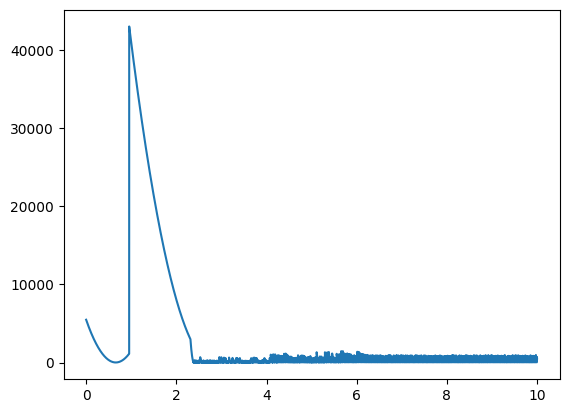

In [ ]:
t=np.linspace(0,n*h,n+1)
gu=[g(k) for k in u]
plt.plot(t,gu)
plt.show()

<font color=red> completar.....

Para testar o ajuste, definimos $f(s)$ e construímos gráficos:

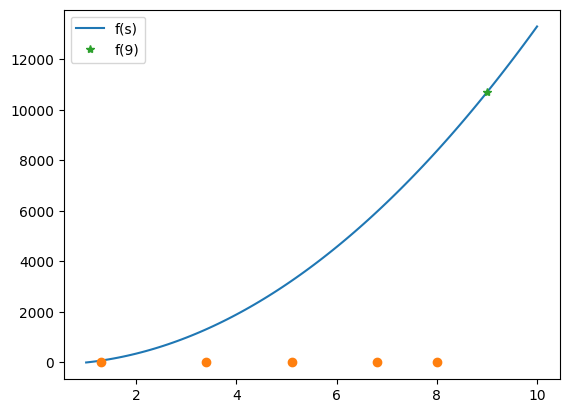

In [ ]:
a,b,c=w[0],w[1],w[2]

def f(s):
  return a*s**2+b*s+c

s=np.linspace(1,10,100)

plt.plot(s,f(s),label='f(s)')
plt.plot(x,y,'o')
plt.plot([9],[f(9)],'*',label='f(9)')
plt.legend()
plt.show()

Um estimativa para $f(9)$ é

In [ ]:
f(9)

43.42527011856823

O módulo ao quadrado do vetor erro $y-f(x)$ é $g(u=(a,b,c))$:

In [ ]:
g([a,b,c])

0.05236960490516261

**Obs:** O comando a seguir resolve o sistema linear $Nu=v$.

In [ ]:
N=np.transpose(A)@A
v=np.transpose(A)@y

u=np.linalg.solve(N,v)
u

array([0.02217422, 0.33029563, 1.61193631])